In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import requests
import numpy as np
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#no monte el drive solo lo puse local por eso sale esto pero todo esta igual

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Depression Professional Dataset.csv")
df.tail()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No
2053,Female,56,2.0,3.0,7-8 hours,Healthy,No,4,5,Yes,No


In [ ]:
#Renombrando columna
df.rename({"Have you ever had suicidal thoughts ?": "Suicidal thoughts"},axis=1, inplace=True)
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Suicidal thoughts,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            2054 non-null   object 
 1   Age                               2054 non-null   int64  
 2   Work Pressure                     2054 non-null   float64
 3   Job Satisfaction                  2054 non-null   float64
 4   Sleep Duration                    2054 non-null   object 
 5   Dietary Habits                    2054 non-null   object 
 6   Suicidal thoughts                 2054 non-null   object 
 7   Work Hours                        2054 non-null   int64  
 8   Financial Stress                  2054 non-null   int64  
 9   Family History of Mental Illness  2054 non-null   object 
 10  Depression                        2054 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 176.6+ KB


In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Work Pressure,float64
Job Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Suicidal thoughts,object
Work Hours,int64
Financial Stress,int64
Family History of Mental Illness,object


In [ ]:
df.shape

(2054, 11)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Suicidal thoughts', 'Work Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
max_sleep= df["Sleep Duration"].max()
min_sleep= df["Sleep Duration"].min()
print(f"El máximo de horas de sueño es: {max_sleep}")
print(f"El mínimo de horas de sueño es:{min_sleep}")

El máximo de horas de sueño es: More than 8 hours
El mínimo de horas de sueño es:5-6 hours


In [ ]:
max_job_satisfaction= df["Job Satisfaction"].max()
min_job_satisfaction= df["Job Satisfaction"].min()
print(f"El máximo de satisfacción laboral es: {max_job_satisfaction}")
print(f"El mínimo de satisfacción laboral es:{min_job_satisfaction}")

El máximo de satisfacción laboral es: 5.0
El mínimo de satisfacción laboral es:1.0


In [ ]:
max_work_pressure= df["Work Pressure"].max()
min_work_pressure= df["Work Pressure"].min()
print(f"El máximo de presión de trabajo es: {max_work_pressure}")
print(f"El mínimo de presión de trabajo es:{min_work_pressure}")

El máximo de presión de trabajo es: 5.0
El mínimo de presión de trabajo es:1.0


In [ ]:
max_work_hours= df["Work Hours"].max()
min_work_hours= df["Work Hours"].min()
print(f"El máximo de horas de trabajo es: {max_work_hours}")
print(f"El mínimo de horas de trabajo es:{min_work_hours}")

El máximo de horas de trabajo es: 12
El mínimo de horas de trabajo es:0


In [ ]:
max_financial_stress= df["Financial Stress"].max()
min_financial_stress= df["Financial Stress"].min()
print(f"El máximo de estrés financiero es: {max_financial_stress}")
print(f"El mínimo de estrés financiero es: {min_financial_stress}")

El máximo de estrés financiero es: 5
El mínimo de estrés financiero es: 1


In [ ]:
filtro_suicidal_thoughts= df[df['Suicidal thoughts']== "Yes"]

filtro_suicidal_thoughts.count()


,0
Gender,989
Age,989
Work Pressure,989
Job Satisfaction,989
Sleep Duration,989
Dietary Habits,989
Suicidal thoughts,989
Work Hours,989
Financial Stress,989
Family History of Mental Illness,989


In [ ]:
work_hours_more_than_8= df['Work Hours']>8
work_hours_more_than_8.value_counts()


,count
Work Hours,
False,1403
True,651


In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Suicidal thoughts'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
filtro_gender= df[df['Gender']== "Female"]
filtro_gender.count()

,0
Gender,988
Age,988
Work Pressure,988
Job Satisfaction,988
Sleep Duration,988
Dietary Habits,988
Suicidal thoughts,988
Work Hours,988
Financial Stress,988
Family History of Mental Illness,988


In [ ]:
filtro_depression= df[df['Depression']== "Yes"]
filtro_gender.count()

,0
Gender,988
Age,988
Work Pressure,988
Job Satisfaction,988
Sleep Duration,988
Dietary Habits,988
Suicidal thoughts,988
Work Hours,988
Financial Stress,988
Family History of Mental Illness,988


In [ ]:
# Filtrar las filas donde Gender es "Female" y "Suicidal thoughts" es "Yes"
filtro_gender_suicidal = df[(df['Gender'] == 'Female') & (df['Suicidal thoughts'] == 'Yes')]

# Mostrar el resultado
print(filtro_gender_suicidal)

      Gender  Age  Work Pressure  Job Satisfaction     Sleep Duration  \
3     Female   44            3.0               5.0          7-8 hours   
5     Female   60            1.0               4.0          7-8 hours   
23    Female   38            2.0               5.0          5-6 hours   
24    Female   54            2.0               5.0          7-8 hours   
25    Female   51            5.0               5.0          7-8 hours   
...      ...  ...            ...               ...                ...   
2041  Female   51            4.0               4.0          7-8 hours   
2047  Female   48            4.0               3.0  Less than 5 hours   
2049  Female   45            1.0               3.0  Less than 5 hours   
2051  Female   23            3.0               1.0  Less than 5 hours   
2052  Female   24            1.0               4.0  Less than 5 hours   

     Dietary Habits Suicidal thoughts  Work Hours  Financial Stress  \
3           Healthy               Yes           1   

In [ ]:
# ¿Cómo afecta la presión laboral al nivel de satisfacción en el trabajo?
# Calcular la correlación entre 'Work Pressure' y 'Job Satisfaction'
correlation = df['Work Pressure'].corr(df['Job Satisfaction'])
print(f'Coeficiente de correlación entre la presión laboral y la satisfacción en el trabajo: {correlation}')

Coeficiente de correlación entre la presión laboral y la satisfacción en el trabajo: -0.012763676507306764


In [ ]:
# La presión laboral disminuye la satisfacción en el trabajo

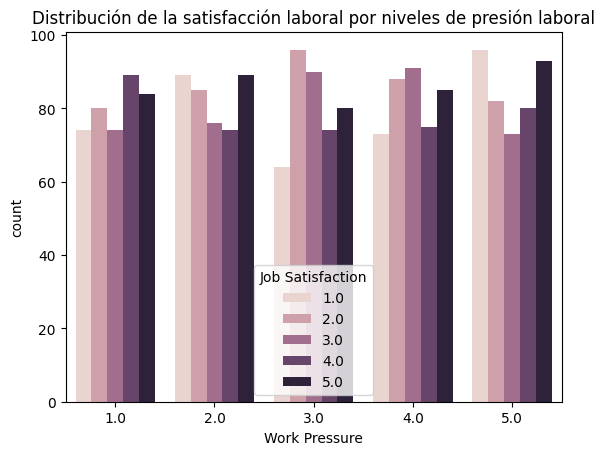

In [ ]:
sns.countplot(x='Work Pressure', hue='Job Satisfaction', data=df)
plt.title('Distribución de la satisfacción laboral por niveles de presión laboral')
plt.show()

In [ ]:
#Muestra 5 condiciones que marque el nivel de Bienestar laboral
def bienestar_laboral(work_pressure, job_satisfaction):
    if work_pressure > 3 and job_satisfaction < 3:
      return 'Negativa'
    elif work_pressure < 3 and job_satisfaction:
      return 'Positiva'
    else:
      return 'Neutra'

In [ ]:
df['Work Pressure'].unique()

array([2., 4., 3., 1., 5.])

# **PREGUNTAS Y SUS RESPUESTAS**

PREGUNTA: ¿Cómo afecta la presión laboral al nivel de satisfacción en el trabajo?

In [ ]:
# Asegurarse de que las columnas clave son numéricas
df['Work Pressure'] = pd.to_numeric(df['Work Pressure'], errors='coerce')
df['Job Satisfaction'] = pd.to_numeric(df['Job Satisfaction'], errors='coerce')

In [ ]:
# Clasificar la presión laboral en categorías
def classify_work_pressure(value):
    if value == 1:
        return 'Muy Baja'
    elif value == 2:
        return 'Baja'
    elif value == 3:
        return 'Media'
    elif value == 4:
        return 'Alta'
    elif value >= 5:
        return 'Muy Alta'

In [ ]:
df['Work Pressure Category'] = df['Work Pressure'].apply(classify_work_pressure)

In [ ]:
# Agrupar los datos por categoría de presión laboral
result = (
    df.groupby('Work Pressure Category')
    .agg({'Job Satisfaction': ['mean', 'count']})
    .reset_index()
)

In [ ]:
# Renombrar columnas para claridad
result.columns = ['Work Pressure Category', 'Avg Job Satisfaction', 'Count']
# Ordenar las columna Avg Job Satisfaction de manera descendente
result_sorted = result.sort_values(by='Avg Job Satisfaction', ascending=False).reset_index(drop=True)
# El DataFrame result muestra cómo varía la satisfacción laboral según la categoría de presión laboral.
print(result_sorted)

  Work Pressure Category  Avg Job Satisfaction  Count
0               Muy Baja              3.072319    401
1                   Alta              3.026699    412
2                  Media              3.024752    404
3               Muy Alta              2.981132    424
4                   Baja              2.973366    413


PREGUNTA: ¿Qué género reporta mayor presión laboral?

In [ ]:
# Agrupar por género y calcular promedio de presión laboral
try:
    pressure_by_gender = (
        df.groupby('Gender')['Work Pressure']
        .mean()
        .reset_index()
        .rename(columns={'Work Pressure': 'Avg Work Pressure'})
    )

    # Ordenar por presión laboral promedio y encontrar el mayor
    pressure_by_gender_sorted = pressure_by_gender.sort_values(
        by='Avg Work Pressure', ascending=False
    )

    # Obtener el género con mayor presión laboral
    # .iloc[0] selecciona la primera fila independientemente del valor del índice.
    top_gender = pressure_by_gender_sorted.iloc[0]

    print(pressure_by_gender_sorted)
    print(f"El género con mayor presión laboral es: {top_gender['Gender']} con un promedio de {top_gender['Avg Work Pressure']:.2f}")
except Exception as e:
    print(f"Se produjo un error: {e}")

   Gender  Avg Work Pressure
0  Female           3.026316
1    Male           3.017824
El género con mayor presión laboral es: Female con un promedio de 3.03


PREGUNTA: ¿Existe una relación entre la duración del sueño y los pensamientos suicidas?

In [ ]:
df['Sleep Duration'].unique()

array(['7-8 hours', '5-6 hours', 'More than 8 hours', 'Less than 5 hours'],
      dtype=object)

In [ ]:
# Preprocesar Sleep Duration
def convert_sleep_duration(value):
    value = value.lower().strip()
    if 'less than 5 hours' in value:
        return 4
    elif 'more than 8 hours' in value:
        return 9
    elif '-' in value:
        parts = value.split('-')
        return (float(parts[0]) + float(parts[1].split()[0])) / 2
    else:
        return np.nan  # En caso de datos no esperados

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)

In [ ]:
# Agrupar los datos por respuesta a pensamientos suicidas
try:
    sleep_analysis = (
        df.groupby('Suicidal thoughts')['Sleep Duration']
        .agg(['mean', 'count'])
        .reset_index()
        .rename(columns={'mean': 'Avg Sleep Duration', 'count': 'Count'})
    )

    print(sleep_analysis)
except Exception as e:
    print(f"Se produjo un error: {e}")

  Suicidal thoughts  Avg Sleep Duration  Count
0                No            6.501878   1065
1               Yes            6.444894    989


PREGUNTA: ¿Cómo impacta el estrés financiero en la probabilidad de desarrollar depresión?

In [ ]:
# Agrupar por nivel de estrés financiero y calcular proporción de depresión
try:
    depression_analysis = (
        df.groupby('Financial Stress')['Depression']
        .apply(lambda x: (x == 'Yes').sum() / len(x))  # Calcular proporción
        .reset_index()
        .rename(columns={'Depression': 'Depression Rate'})
    )

    print(depression_analysis)
except Exception as e:
    print(f"Se produjo un error: {e}")

   Financial Stress  Depression Rate
0                 1         0.049140
1                 2         0.062640
2                 3         0.090206
3                 4         0.110565
4                 5         0.185185


PREGUNTA: ¿Las personas con antecedentes familiares de enfermedades mentales son más propensas a experimentar pensamientos suicidas?

In [ ]:
# Preprocesar los datos (asegúrate de que los valores sean consistentes)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].str.strip()
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.strip()

In [ ]:
# Agrupar por antecedentes familiares y calcular la proporción de pensamientos suicidas
# La proporción se calcula dividiendo el número de personas con pensamientos suicidas (respuestas "Yes") por el total de personas en ese grupo.
# Es decir, el número de "Yes" dividido entre el número total de registros dentro del grupo.
try:
    suicidal_analysis = (
        df.groupby('Family History of Mental Illness')['Suicidal thoughts']
        .apply(lambda x: (x == 'Yes').sum() / len(x))  # Calcular proporción de "Yes"
        .reset_index()
        .rename(columns={'Suicidal thoughts': 'Suicidal Thoughts Rate'})
    )

    print(suicidal_analysis)
except Exception as e:
    print(f"Se produjo un error: {e}")

  Family History of Mental Illness  Suicidal Thoughts Rate
0                               No                0.480880
1                              Yes                0.482143


PREGUNTA: ¿Qué tipo de hábitos alimenticios son más comunes en personas con altos niveles de presión laboral?

In [ ]:
# Filtrar las personas con altos niveles de presión laboral
high_pressure_df = df[df['Work Pressure Category'] == 'Muy Alta']

In [ ]:
# Agrupar por hábitos alimenticios   y contar la cantidad de cada tipo de hábito
# Contar la cantidad de veces que aparece cada tipo de hábito alimenticio en el DataFrame filtrado.
habit_counts = high_pressure_df['Dietary Habits'].value_counts().reset_index()
habit_counts.columns = ['Dietary Habits', 'Count']

In [ ]:
# Ordenar por la frecuencia de los hábitos alimenticios
habit_counts_sorted = habit_counts.sort_values(by='Count', ascending=False)

In [ ]:
# Mostrar el resultado
print(habit_counts_sorted)

  Dietary Habits  Count
0        Healthy    145
1      Unhealthy    144
2       Moderate    135


# **OBTENER DATASET DESDE UNA API**

In [ ]:
url = "https://anxiety-depression1.p.rapidapi.com/records"

querystring = {"orderBy":"dataListIndex_asc","index":"0","limit":"2000"}

headers = {
	"x-rapidapi-key": "991ebd9a6dmsh9d2561c04173f9ep1dd34djsna8888f15a3f1",
	"x-rapidapi-host": "anxiety-depression1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    json_data = response.json()
    df_api = pd.DataFrame(json_data['data'])
else:
    print(f"Error: {response.status_code}")

In [ ]:
# Mostrar el DataFrame
df_api.head()

,dataListIndex,indicator,group,state,subgroup,phase,timePeriod,timePeriodLabel,timePeriodStartDate,timePeriodEndDate,value,lowCi,highCi,confidenceInterval,quartileRange
0,0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,
2,10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,29.4,26.8,32.1,26.8 - 32.1,
3,100,Symptoms of Anxiety Disorder,By State,Hawaii,Hawaii,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.3,27.1,37.8,27.1 - 37.8,31.7 - 37.0
4,1000,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alaska,Alaska,1,5,"May 28 - June 2, 2020",05/28/2020,06/02/2020,31.6,27.1,36.3,27.1 - 36.3,26.0-31.6


In [ ]:
df_api.shape

(500, 15)

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Suicidal thoughts,0
Work Hours,0
Financial Stress,0
Family History of Mental Illness,0


PREGUNTA: ¿Qué rango de edades presentó una mayor prevalencia de síntomas de depresion?

In [ ]:
# Convertir la columna 'value' a numérico
df_api['value'] = pd.to_numeric(df_api['value'], errors='coerce')

In [ ]:
# Filtrar datos para el indicador y rango de edades
filtered_df = df_api[
    (df_api['indicator'] == 'Symptoms of Depressive Disorder') &
    (df_api['group'].str.strip() == 'By Age')
]

In [ ]:
filtered_df.head(10)

,dataListIndex,indicator,group,state,subgroup,phase,timePeriod,timePeriodLabel,timePeriodStartDate,timePeriodEndDate,value,lowCi,highCi,confidenceInterval,quartileRange
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,
174,10153,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
175,10154,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
176,10155,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
177,10156,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
178,10157,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
179,10158,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
180,10159,Symptoms of Depressive Disorder,By Age,United States,80 years and above,-1,1,"May 25 - May 31, 2022",05/25/2022,05/31/2022,NaN,,,,
204,10180,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,3.5,46,"Jun 1 - Jun 13, 2022",06/01/2022,06/13/2022,36.6,33.3,40.1,33.3 - 40.1,
205,10181,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,3.5,46,"Jun 1 - Jun 13, 2022",06/01/2022,06/13/2022,26.8,25.1,28.6,25.1 - 28.6,


In [ ]:
# Encontrar el rango de edades con mayor prevalencia
try:
    if not filtered_df.empty:
        max_row = filtered_df.loc[filtered_df['value'].idxmax()]
        result = f"El rango de edades con mayor prevalencia de síntomas de depresión es {max_row['subgroup']} con un valor de {max_row['value']}%."
    else:
        result = "No se encontraron datos sobre síntomas de depresión por rango de edades."
except Exception as e:
    result = f"Hubo un error al calcular: {str(e)}"

In [ ]:
# Imprimir el resultado
print(result)

El rango de edades con mayor prevalencia de síntomas de depresión es 18 - 29 years con un valor de 36.6%.


# ***------------------------ Modulo 03 ------------------------***

### **POsTWORK SESION 1**


1. Identifica las columnas de tu dataset que tengan datos numéricos.




In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Work Pressure,float64
Job Satisfaction,float64
Sleep Duration,float64
Dietary Habits,object
Suicidal thoughts,object
Work Hours,int64
Financial Stress,int64
Family History of Mental Illness,object




* Age
* Work Pressure
* Job Satisfaction
* Work Hours
* Financial Stress





2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).



* **¿Cómo afecta la presión laboral al nivel de satisfacción en el trabajo?**
  * Las columnas Work Pressure y Job Satisfaction son relevantes.

* **¿Qué género reporta mayor presión laboral?**
  * La columna Work Pressure es relevante.

* **¿Existe una relación entre la duración del sueño y los pensamientos suicidas?**
  * Ninguna de las columnas son relevantes.

* **¿Cómo impacta el estrés financiero en la probabilidad de desarrollar depresión?**
  * La columna Financial Stress es relevante.

* **¿Las personas con antecedentes familiares de enfermedades mentales son más propensas a experimentar pensamientos suicidas?**
  * Ninguna de las columnas son relevantes

* **¿Qué tipo de hábitos alimenticios son más comunes en personas con altos niveles de presión laboral?**
  * Solo la columna Work Pressure es relevante

3. Obtén los siguientes estimados de tus columnas numéricas:

  * Promedio
  * Mediana
  * Media Truncada
  * Desviación estándar
  * Rango
  * Percentiles 25 y 75 (por lo menos)
  * Rango intercuartil



In [ ]:
def estimados_columnas(columnas):
    for columna in columnas:
        print(f"Estimados de locación y variabilidad de la columna: {columna}\n")
        data = df[columna].dropna()
        promedio = data.mean()
        mediana = data.median()
        # Elegí el 10% como proporción para la media truncada porque es un valor
        # comúnmente utilizado en estadísticas para manejar valores atípicos moderados.
        # Un 10% elimina el 5% de los datos más bajos y el 5% de los más altos.
        # Creo que esto es suficiente para reducir el impacto de valores extremos sin perder demasiada información.
        media_truncada = trim_mean(data, proportiontocut=0.1)  # Elimina 10% de valores extremos
        desviacion_std = data.std()
        rango = data.max() - data.min()
        percentil_25 = df[columna].quantile(0.25)
        percentil_75 = df[columna].quantile(0.75)
        rango_intercuartil = percentil_75 - percentil_25

        print(f"Promedio: {promedio:.2f}")
        print(f"Mediana: {mediana:.2f}")
        print(f"Media truncada (10%): {media_truncada:.2f}")
        print(f"Desviación estándar: {desviacion_std:.2f}")
        print(f"Rango: {rango:.2f}")
        print(f"Percentil 25: {percentil_25:.2f}")
        print(f"Percentil 75: {percentil_75:.2f}")
        print(f"Rango intercuartil: {rango_intercuartil:.2f}")
        print(f"--------------------------------------------------\n")

In [ ]:
columnas_df = ["Age", "Work Pressure", "Job Satisfaction", "Work Hours", "Financial Stress"]
estimados_columnas(columnas_df)

Estimados de locación y variabilidad de la columna: Age

Promedio: 42.17
Mediana: 43.00
Media truncada (10%): 42.75
Desviación estándar: 11.46
Rango: 42.00
Percentil 25: 35.00
Percentil 75: 51.75
Rango intercuartil: 16.75
--------------------------------------------------

Estimados de locación y variabilidad de la columna: Work Pressure

Promedio: 3.02
Mediana: 3.00
Media truncada (10%): 3.03
Desviación estándar: 1.42
Rango: 4.00
Percentil 25: 2.00
Percentil 75: 4.00
Rango intercuartil: 2.00
--------------------------------------------------

Estimados de locación y variabilidad de la columna: Job Satisfaction

Promedio: 3.02
Mediana: 3.00
Media truncada (10%): 3.02
Desviación estándar: 1.42
Rango: 4.00
Percentil 25: 2.00
Percentil 75: 4.00
Rango intercuartil: 2.00
--------------------------------------------------

Estimados de locación y variabilidad de la columna: Work Hours

Promedio: 5.93
Mediana: 6.00
Media truncada (10%): 5.93
Desviación estándar: 3.77
Rango: 12.00
Percentil 25



> NOTA: Antes de seguir con el siguiente postwork. No se como lo vean ustedes pero tal vez tengamos que pensar bien en si seguir con las preguntas que tenemos o mejor cambiar algunas.
NOTA2>considero que las preguntas si se prestan para hacer los graficos que hemos visto y darles interpretacion




**POSTWORK SESION 2**

En este Postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset. Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

1. Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.

In [ ]:
columnas_df = ["Age", "Work Pressure", "Job Satisfaction", "Work Hours", "Financial Stress"]

In [ ]:
def destibucion_con_boxplots(columnas):
    for columna in columnas:
        print(f"Generando boxplot para la columna: {columna}\n")
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[columna])
        plt.title(f"Boxplot de {columna}", fontsize=16)
        plt.xlabel(columna, fontsize=14)
        plt.grid(True)
        plt.show()

Generando boxplot para la columna: Age



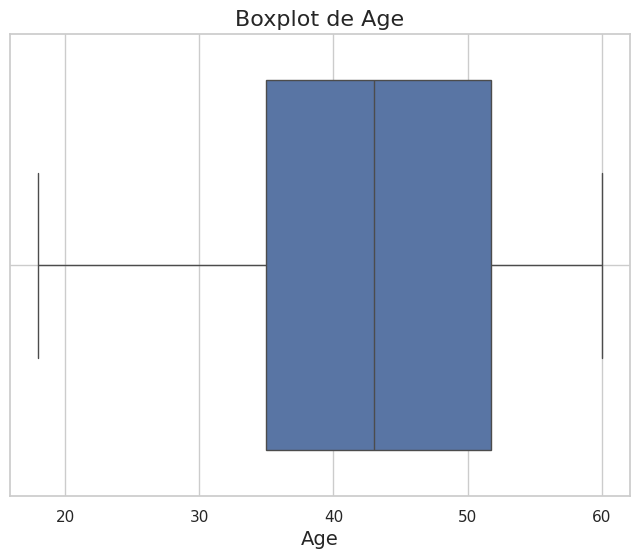

Generando boxplot para la columna: Work Pressure



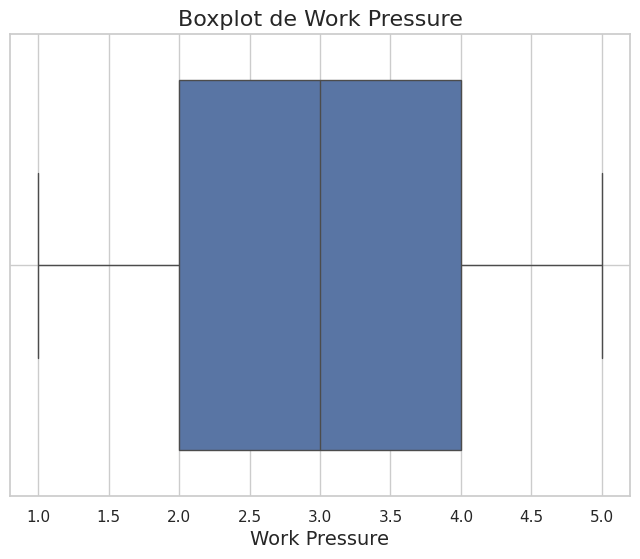

Generando boxplot para la columna: Job Satisfaction



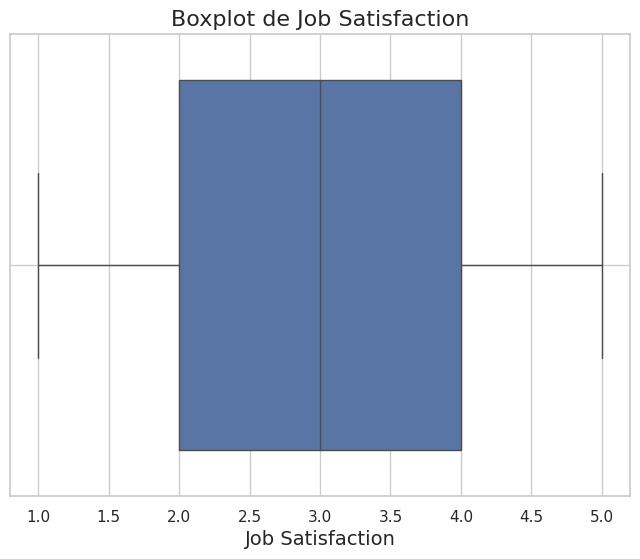

Generando boxplot para la columna: Work Hours



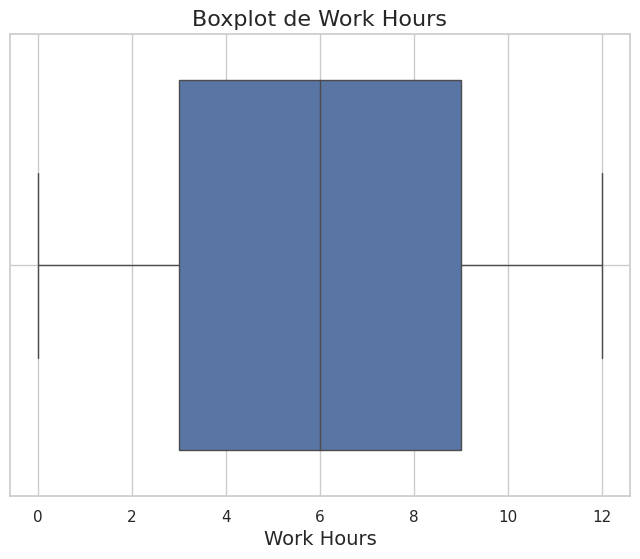

Generando boxplot para la columna: Financial Stress



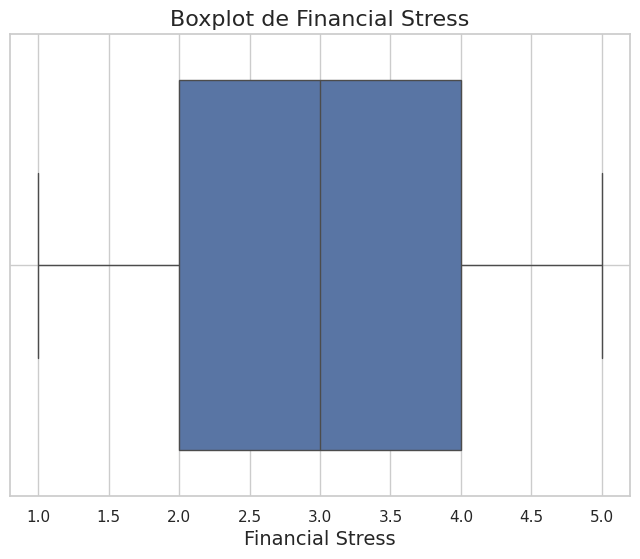

In [ ]:
destibucion_con_boxplots(columnas_df)

2. Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.

In [ ]:
def filtro_valores_atipicos_iqr(columna):
    print(f"Filtrando valores atípicos para la columna: {columna}\n")
    data = df[columna].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    filtered_df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    print(f"Antes de filtrar: Media = {data.mean():.2f}, Mediana = {data.median():.2f}, Desviación estándar = {data.std():.2f}")
    print(f"Después de filtrar: Media = {filtered_df[columna].mean():.2f}, Mediana = {filtered_df[columna].median():.2f}, Desviación estándar = {filtered_df[columna].std():.2f}\n")
    print("--------------------------------------------------------------------------------------\n")

    return filtered_df

In [ ]:
# Filtrar valores atípicos y comparar estadísticas
for columna in columnas_df:
    df = filtro_valores_atipicos_iqr(columna)

Filtrando valores atípicos para la columna: Age

Antes de filtrar: Media = 42.17, Mediana = 43.00, Desviación estándar = 11.46
Después de filtrar: Media = 42.17, Mediana = 43.00, Desviación estándar = 11.46

--------------------------------------------------------------------------------------

Filtrando valores atípicos para la columna: Work Pressure

Antes de filtrar: Media = 3.02, Mediana = 3.00, Desviación estándar = 1.42
Después de filtrar: Media = 3.02, Mediana = 3.00, Desviación estándar = 1.42

--------------------------------------------------------------------------------------

Filtrando valores atípicos para la columna: Job Satisfaction

Antes de filtrar: Media = 3.02, Mediana = 3.00, Desviación estándar = 1.42
Después de filtrar: Media = 3.02, Mediana = 3.00, Desviación estándar = 1.42

--------------------------------------------------------------------------------------

Filtrando valores atípicos para la columna: Work Hours

Antes de filtrar: Media = 5.93, Mediana = 6.0

3. Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

In [ ]:
def calculo_bins(data):
    n = len(data)
    if n > 0:
        return int(np.ceil(2 * (n ** (1/3))))  # Regla de Sturges
    return 10  # Valor por defecto

In [ ]:
def analisis_frecuencias_y_distribuciones(columnas):
    for columna in columnas:
        print(f"\nAnálisis de la columna: {columna}")

        data = df[columna].dropna()
        bins_data = calculo_bins(data)

        # Crear segmentos y calcular frecuencias
        segmentos = pd.cut(data, bins=bins_data)
        frecuencias = data.groupby(segmentos, observed=False).count()
        print("Tabla de frecuencias por segmentos:")
        print(frecuencias)

        # Generar histograma
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(data, kde=True, bins=bins_data, color='blue')
        plt.title(f"Histograma de {columna}", fontsize=16)
        plt.xlabel(columna, fontsize=14)
        plt.ylabel("Frecuencia", fontsize=14)
        plt.grid(True)
        plt.show()

        skewness = skew(data)
        kurt = kurtosis(data)

        print(f"Asimetría (Skewness): {skewness:.2f}")
        print(f"Curtosis: {kurt:.2f}")
        print("-----------------------------------------------------------------\n")


Análisis de la columna: Age
Tabla de frecuencias por segmentos:
Age
(17.958, 19.615]     57
(19.615, 21.231]     52
(21.231, 22.846]     28
(22.846, 24.462]     61
(24.462, 26.077]     62
(26.077, 27.692]     31
(27.692, 29.308]     69
(29.308, 30.923]     27
(30.923, 32.538]     52
(32.538, 34.154]     68
(34.154, 35.769]     61
(35.769, 37.385]    107
(37.385, 39.0]      130
(39.0, 40.615]       61
(40.615, 42.231]    120
(42.231, 43.846]     59
(43.846, 45.462]    108
(45.462, 47.077]    130
(47.077, 48.692]     59
(48.692, 50.308]    135
(50.308, 51.923]     63
(51.923, 53.538]    109
(53.538, 55.154]    110
(55.154, 56.769]     73
(56.769, 58.385]    111
(58.385, 60.0]      111
Name: Age, dtype: int64


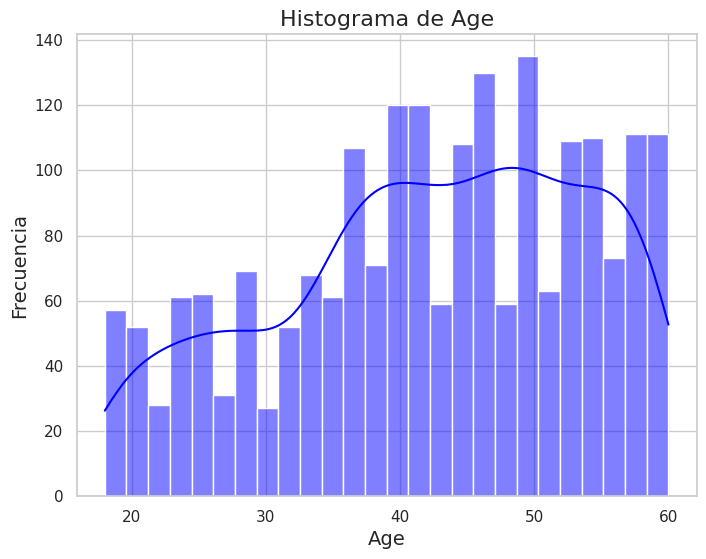

NameError: name 'skew' is not defined

In [ ]:
analisis_frecuencias_y_distribuciones(columnas_df)

***CATEGORIZACION DE HISTOGRAMAS***

**Age:** asimétrica hacia la izquierda
( La distribución tiene una cola levemente más larga en el lado izquierdo (hacia los valores más bajos),presentan una distribución más suave con colas menos pronunciadas, lo que indica una menor probabilidad de valores atípicos)

**Work Pressure:** simétrica

**Job Satisfaction:** simétrica

**Work Hours:** bimodal
(curtosis negativa, lo que significa que la distribución es más plana y con menos valores extremos en comparación con una distribución normal estándar.los datos parecen estar cerca de una distribución normal, pero con un achatamiento en el pico y con colas menos pronunciadas)

**Financial Stress:** simétrica
(distribución casi simétrica y menos propensa a valores extremos (debido a la curtosis negativa), los datos estan distribuidos de manera moderadamente normal, pero con colas más suaves que una distribución normal estándar. *nota:sigue el mismo comportamiento que la presion en el trabajo y la satisfaccion laboral*)

4. Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

<ipython-input-35-763fbd998f2d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Work Hours"], shade=True, label=f"Work Pressure {pressure}")
<ipython-input-35-763fbd998f2d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Work Hours"], shade=True, label=f"Work Pressure {pressure}")
<ipython-input-35-763fbd998f2d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Work Hours"], shade=True, label=f"Work Pressure {pressure}")
<ipython-input-35-763fbd998f2d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update

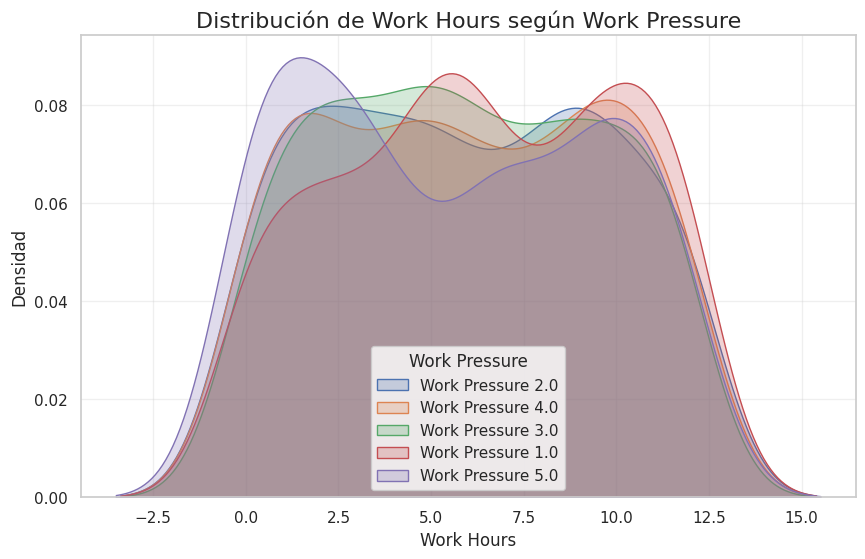

In [ ]:
# Crear la gráfica de densidad segmentada por "Work Pressure"
plt.figure(figsize=(10, 6))
for pressure in df["Work Pressure"].unique():
    subset = df[df["Work Pressure"] == pressure]
    sns.kdeplot(subset["Work Hours"], shade=True, label=f"Work Pressure {pressure}")

# Personalizar la gráfica
plt.title("Distribución de Work Hours según Work Pressure", fontsize=16)
plt.xlabel("Work Hours", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Work Pressure")
plt.grid(True, alpha=0.3)
plt.show()

**Interpretación:**

* La mayoría de las personas, independientemente de la presión laboral, trabajan aproximadamente 8 horas por día.

* La presión laboral más alta (5.0) parece asociarse con una mayor dispersión en las horas trabajadas, lo que podría reflejar un grupo más diverso en términos de carga laboral.

* Los niveles más bajos de presión laboral tienden a tener distribuciones más ajustadas y concentradas alrededor de las 8 horas.

<ipython-input-36-59110988404d>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Estrés Financiero")


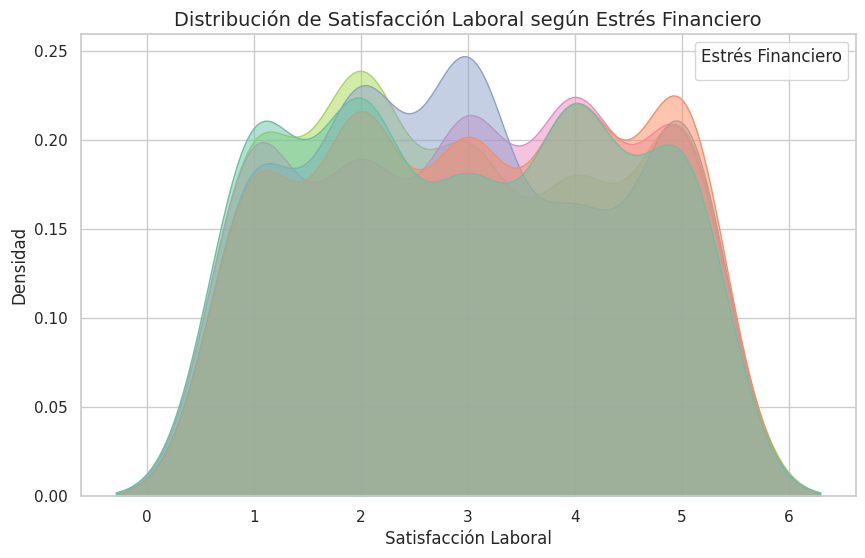

In [ ]:
# Crear la gráfica de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Job Satisfaction", hue="Financial Stress",
            fill=True, common_norm=False, alpha=0.5, palette="Set2")

# Añadir títulos y etiquetas
plt.title("Distribución de Satisfacción Laboral según Estrés Financiero", fontsize=14)
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Densidad")
plt.legend(title="Estrés Financiero")
plt.grid(True)
plt.show()

interpretacion
El nivel de estrés financiero parece influir en la satisfacción laboral. Un menor estrés financiero está relacionado con distribuciones más concentradas hacia valores altos de satisfacción, mientras que niveles altos de estrés financiero muestran una mayor dispersión e incluso una tendencia hacia menores niveles de satisfacción laboral.

<ipython-input-37-f59a211b4804>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="satisfacción laboral")


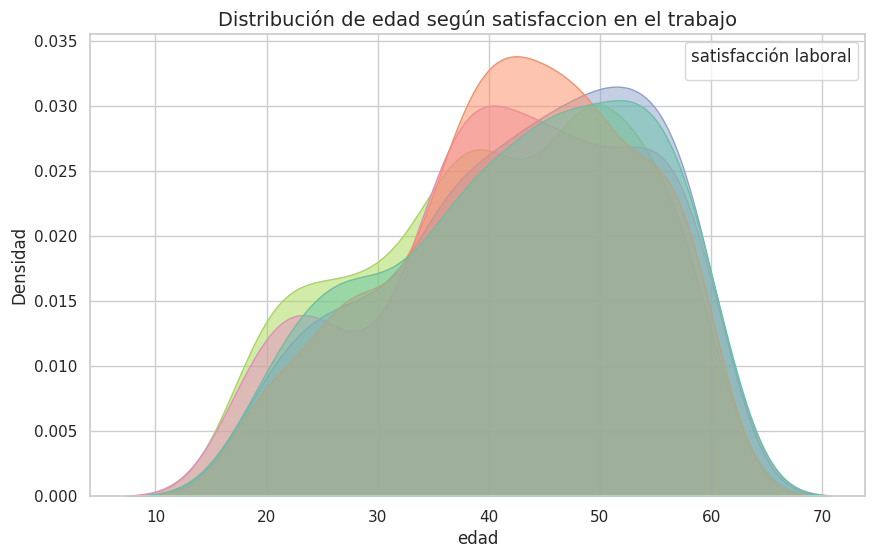

In [ ]:
# Crear la gráfica de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", hue="Job Satisfaction",
            fill=True, common_norm=False, alpha=0.5, palette="Set2")

# Añadir títulos y etiquetas
plt.title("Distribución de edad según satisfaccion en el trabajo", fontsize=14)
plt.xlabel("edad")
plt.ylabel("Densidad")
plt.legend(title="satisfacción laboral")
plt.grid(True)
plt.show()

interpretacion:
al interpretar la grafica podemos ver que a menor edad existe tambien una menor satisfaccion laboral, y que la mayor concentracion de satisfaccion laboral esta entre un rango aproximado de 35 y 55 años

**POSTWORK SESION 3**

**Requisitos:**
* Tener un dataset limpio.
* Tener una serie de preguntas que queremos contestar usando nuestro dataset.
* Haber explorado ya la distribuciones de nuestras variables numéricas.

**Desarrollo:**

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

1. Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.** LISTO**

2. Identifica todas las variables categóricas en tu dataset.

3. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

5. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

6. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

7. De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

**POSTWORK SESION 4**

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.

2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.

3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.

5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

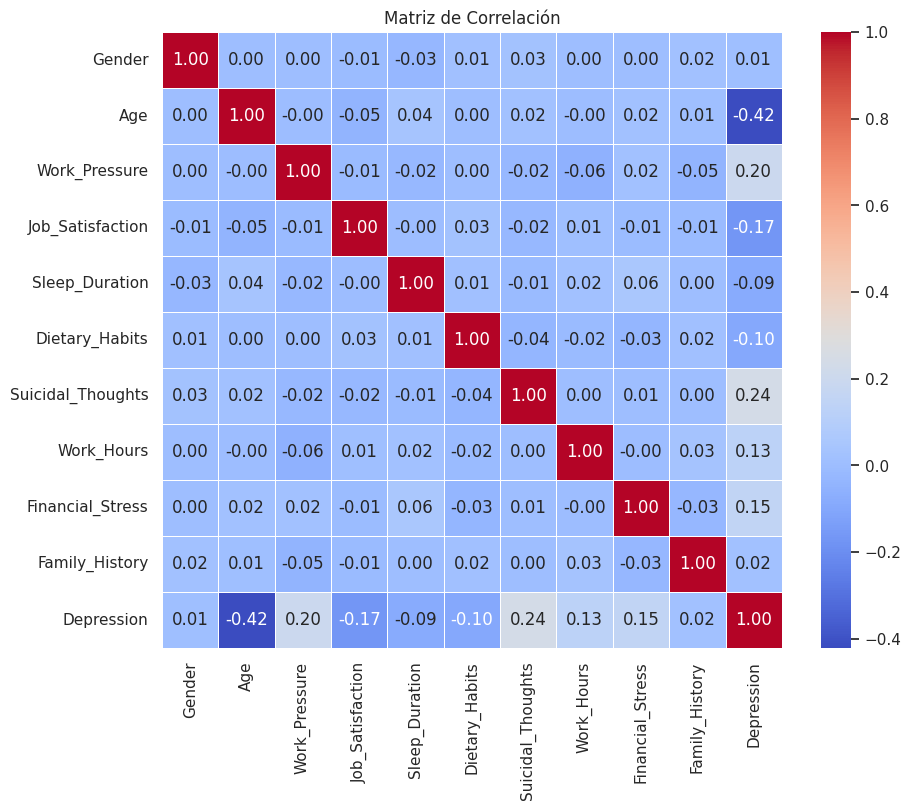

 matriz generada


In [ ]:
# Renombrar columnas para evitar espacios y mejorar legibilidad
df.columns = [
    "Gender", "Age", "Work_Pressure", "Job_Satisfaction", "Sleep_Duration", "Dietary_Habits",
    "Suicidal_Thoughts", "Work_Hours", "Financial_Stress", "Family_History", "Depression"
]

# Verificar y manejar valores faltantes
df = df.dropna()  # Eliminar filas con valores nulos

# Convertir columnas categóricas en formato adecuado
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})  # Codificar género como 0 y 1

# Convertir respuestas de "Yes"/"No" a valores binarios (1 para Sí, 0 para No)
binary_columns = ["Suicidal_Thoughts", "Family_History", "Depression"]
for col in binary_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Normalizar valores en "Sleep_Duration"
df["Sleep_Duration"] = df["Sleep_Duration"].map({
    "Less than 5 hours": 4, "5-6 hours": 5.5, "7-8 hours": 7.5, "More than 8 hours": 9
})

# Normalizar valores en "Dietary_Habits"
df["Dietary_Habits"] = df["Dietary_Habits"].map({
    "Unhealthy": 0, "Moderate": 1, "Healthy": 2
})

# Asegurar que las columnas numéricas tengan el tipo de dato correcto
df = df.astype({
    "Age": int,
    "Work_Pressure": int,
    "Job_Satisfaction": int,
    "Work_Hours": int,
    "Financial_Stress": int,
    "Sleep_Duration": float,
    "Dietary_Habits": int,
})

# Generar matriz de correlación
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Guardar el dataset limpio
df.to_csv("depression_professional_dataset_clean.csv", index=False)

print(" matriz generada")


interpretacion de la matriz
Depresión y Pensamientos Suicidas

Existe una fuerte correlación positiva entre la depresión y los pensamientos suicidas. Esto indica que a medida que aumenta la depresión, también lo hacen los pensamientos suicidas.


Depresión y Estrés Financiero

Hay una correlación moderada positiva, lo que sugiere que mayores niveles de estrés financiero están asociados con una mayor probabilidad de depresión.

Depresión y Presión Laboral

También hay una correlación positiva, indicando que la presión laboral puede contribuir a la depresión.


Depresión y Satisfacción Laboral

Existe una correlación negativa moderada, lo que sugiere que una mayor satisfacción en el trabajo se asocia con menores niveles de depresión.
Horas de Trabajo y Presión Laboral

Como era de esperarse, a mayor cantidad de horas trabajadas, mayor es la presión laboral percibida, sin embargo es muy poco su correlacion negativa.

Horas de Trabajo y Sueño
Hay una correlación  lo que significa que quienes trabajan más horas tienden a dormir menos.

Historia Familiar de Depresión y Depresión

Existe una correlación positiva entre tener antecedentes familiares de depresión y la presencia de la misma.

interpretaciones  a las que se llegaron despues de analizar la matriz:
1-tener mayor presión en el trabajo podría estar asociada con más estrés financiero.
2-menos horas de sueño podrían estar relacionadas con una mayor depresión.
3-estado mental del individuo con depresion puede llevarlo a tener pensamientos suicidas y presentan una correlacion alta entre ambas.

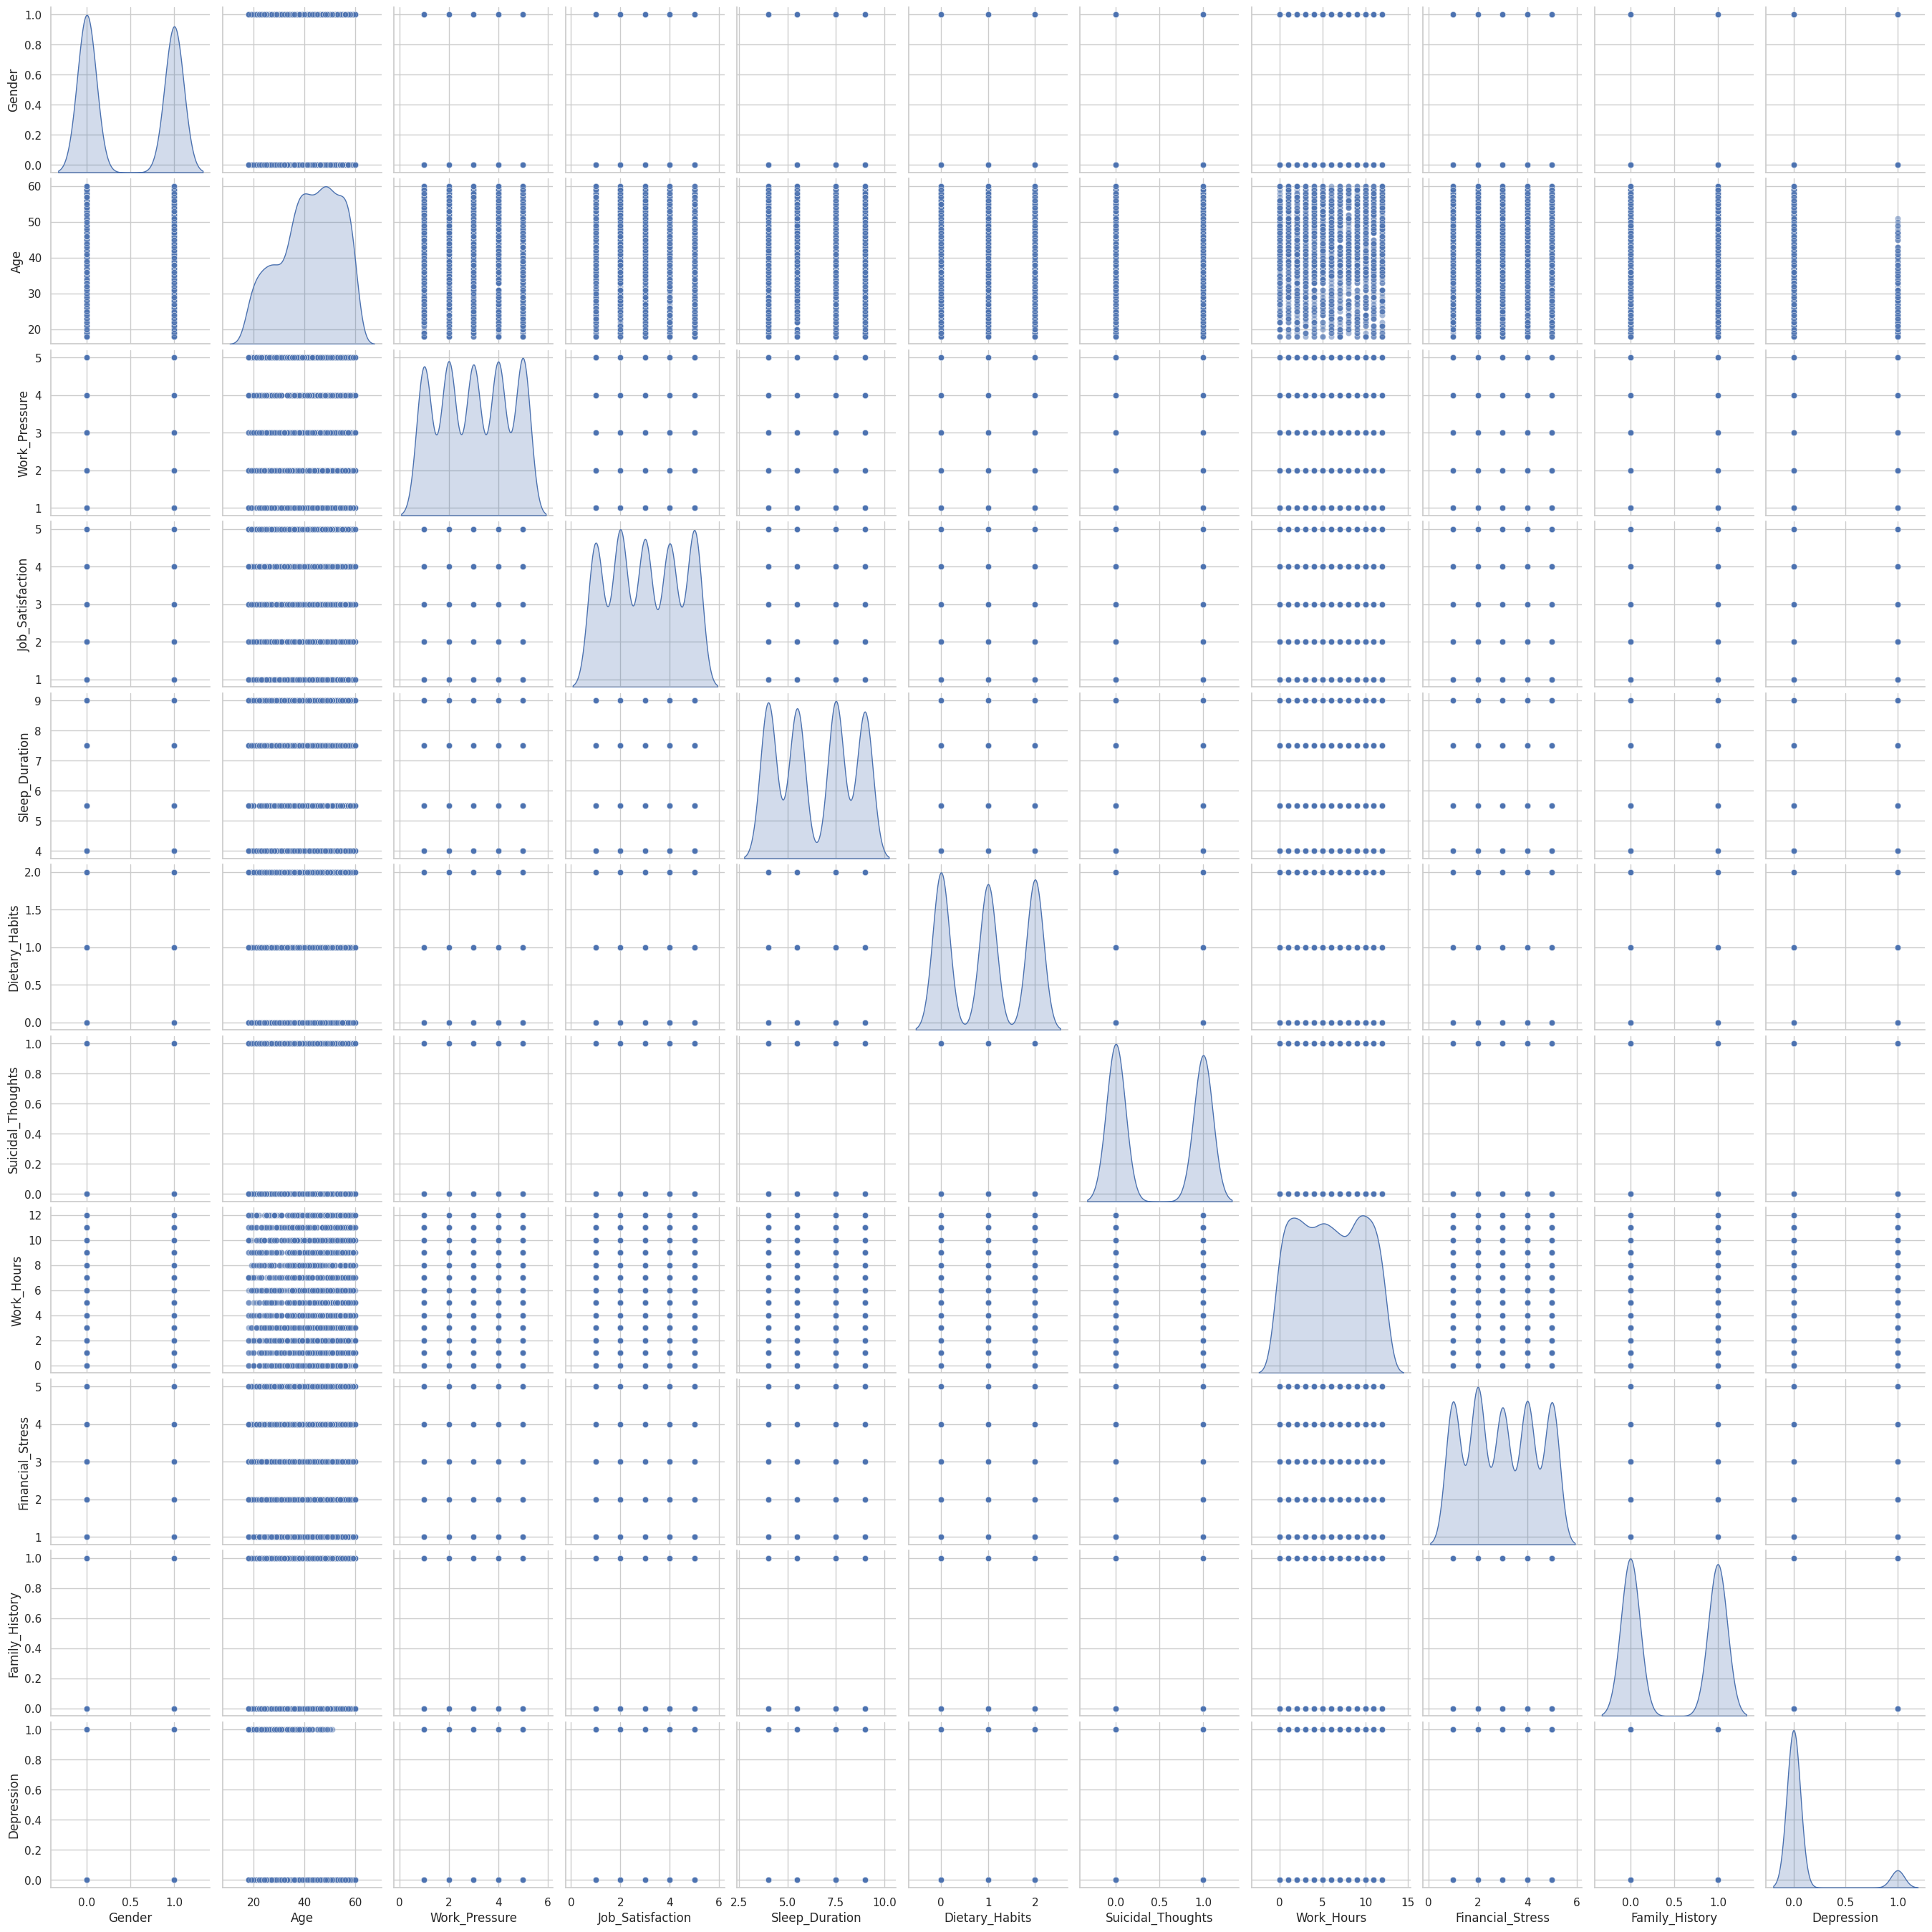

In [ ]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()


Error Cuadrático Medio (MSE): 0.09115760733561552
Coeficiente de Determinación (R²): 0.026893693835976173


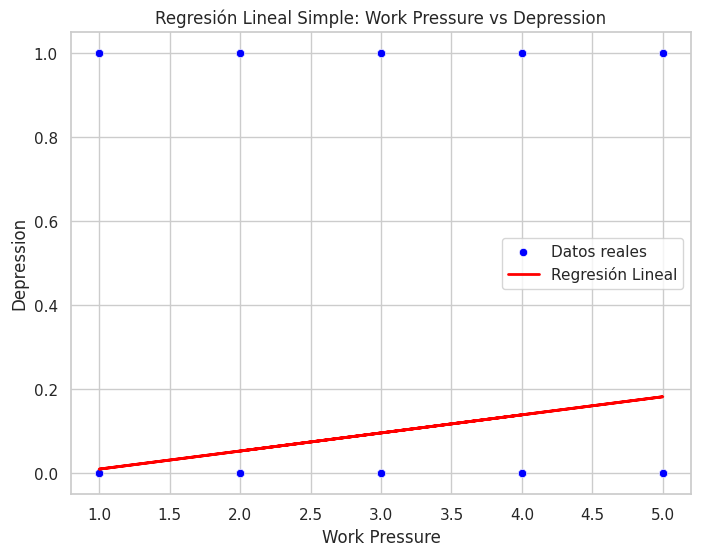

In [ ]:

X = df[["Work_Pressure"]]  # Variable predictora
y = df["Depression"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Work Pressure")
plt.ylabel("Depression")
plt.title("Regresión Lineal Simple: Work Pressure vs Depression")
plt.legend()
plt.show()

Error Cuadrático Medio (MSE): 0.09229715908289782
Coeficiente de Determinación (R²): 0.014728993336565632


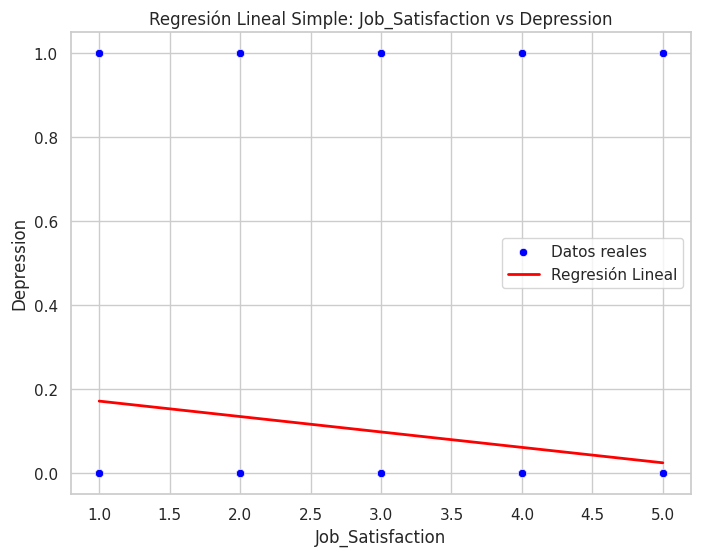

In [ ]:

X = df[["Job_Satisfaction"]]  # Variable predictora
y = df["Depression"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Job_Satisfaction")
plt.ylabel("Depression")
plt.title("Regresión Lineal Simple: Job_Satisfaction vs Depression")
plt.legend()
X = df[["Work_Pressure"]]  # Variable predictora
y = df["Depression"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Work Pressure")
plt.ylabel("Depression")
plt.title("Regresión Lineal Simple: Work Pressure vs Depression")
plt.legend()
plt.show()plt.show()

Error Cuadrático Medio (MSE): 0.08812999701025068
Coeficiente de Determinación (R²): 0.05921339579319018


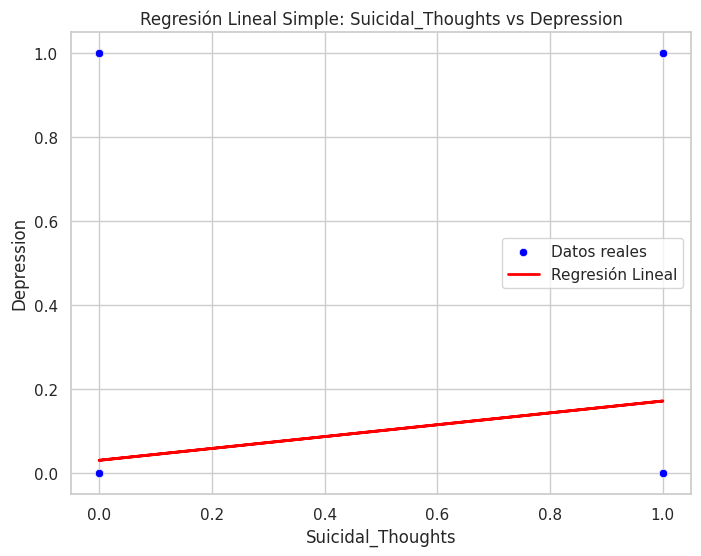

In [ ]:

X = df[["Suicidal_Thoughts"]]  # Variable predictora
y = df["Depression"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión Lineal")
plt.xlabel("Suicidal_Thoughts")
plt.ylabel("Depression")
plt.title("Regresión Lineal Simple: Suicidal_Thoughts vs Depression")
plt.legend()
plt.show()

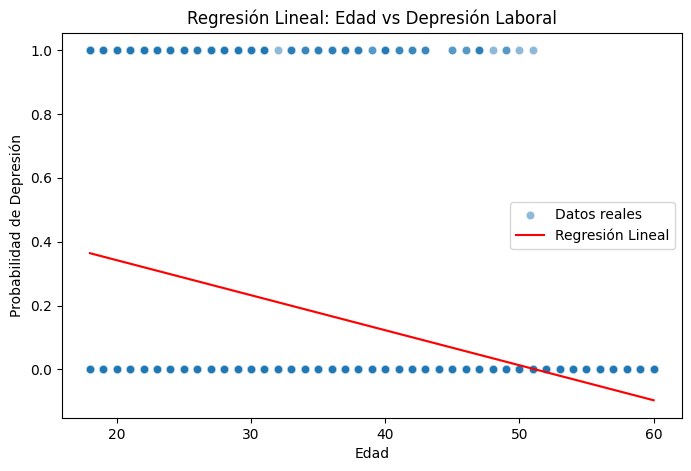

                            OLS Regression Results                            
Dep. Variable:             Depression   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     442.7
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           3.72e-89
Time:                        01:18:50   Log-Likelihood:                -230.17
No. Observations:                2054   AIC:                             464.3
Df Residuals:                    2052   BIC:                             475.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5615      0.023     24.642      0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar los datos
df = pd.read_csv("depression_professional_dataset.csv")

# Convertir la variable 'Depression' en numérica
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})

# Variables
X = df['Age']  # Edad
y = df['Depression']  # Depresión (0 o 1)

# Agregar constante para la regresión
X_const = sm.add_constant(X)

# Ajustar modelo de regresión lineal
model = sm.OLS(y, X_const).fit()

# Predicciones
df['Predicted_Depression'] = model.predict(X_const)

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=y, alpha=0.5, label="Datos reales")
sns.lineplot(x=X, y=df['Predicted_Depression'], color='red', label="Regresión Lineal")

plt.xlabel("Edad")
plt.ylabel("Probabilidad de Depresión")
plt.title("Regresión Lineal: Edad vs Depresión Laboral")
plt.legend()
plt.show()

# Mostrar el resumen del modelo
print(model.summary())

**POSTWORK SESION 5**

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.

2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:

  * La distribución, su asimetría y curtosis
  * El error estándar
  * El intervalo de confianza que te parezca más apropiado

3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

In [ ]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Suicidal thoughts,Work Hours,Financial Stress,Family History of Mental Illness,Depression,Work Pressure Category
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No,Baja
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No,Alta
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No,Baja
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No,Media
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No,Alta


In [ ]:
df.size

24648

In [ ]:
# Agrupar por atleta y obtener valores únicos de altura, peso y deporte
df_grouped = df.groupby('Age')[['Work Pressure']]



In [ ]:
df_grouped.head()

,Work Pressure
0,2.0
1,4.0
2,2.0
3,3.0
4,4.0
...,...
533,2.0
642,4.0
656,2.0
670,1.0


#**¿CÓMO AFECTA LA SATISFACCIÓN LABORAL A LA DEPRESIÓN**




In [ ]:
df.loc[:, 'count'] = 1
conteo_job_depression=df.groupby(['Job_Satisfaction', "Depression"])["count"].sum().unstack()
conteo_job_depression


Depression,0,1
Job_Satisfaction,,
1,321,75
2,375,56
3,373,31
4,374,18
5,408,23


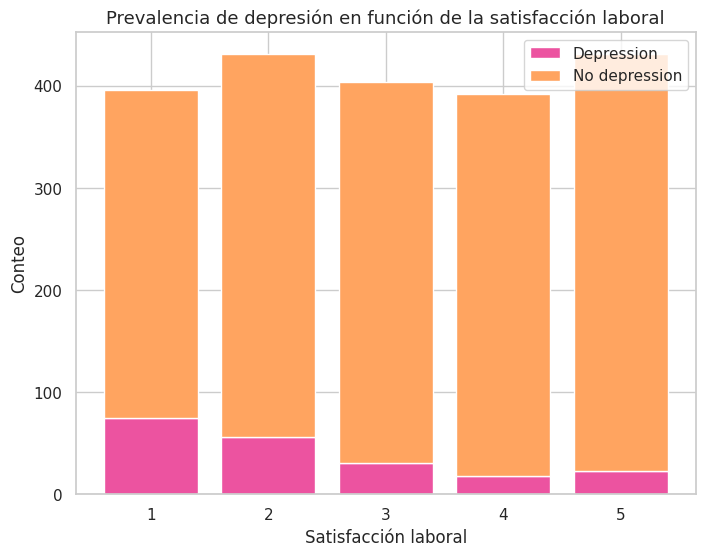

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(conteo_job_depression.index, conteo_job_depression[1], label='Depression', color=["#ec53a0"])
ax.bar(conteo_job_depression.index, conteo_job_depression[0], bottom=conteo_job_depression[1], label='No depression', color=["#FFA460"])

ax.set_ylabel('Conteo')
ax.set_xlabel('Satisfacción laboral')
ax.set_title("Prevalencia de depresión en función de la satisfacción laboral", fontsize=13)
ax.legend()
plt.show()

 Conclusiones
*   Existe una relación entre la satisfacción laboral y la depresión
*   Una satisfacción laboral baja está asociada a la depresión



#**¿CÓMO AFECTA LA PRESIÓN LABORAL A LA DEPRESIÓN**


In [ ]:
df.loc[:, 'count'] = 1
conteo_pressure_depression=df.groupby(['Job_Satisfaction', "Depression"])["count"].sum().unstack()
conteo_pressure_depression


Depression,0,1
Job_Satisfaction,,
1,321,75
2,375,56
3,373,31
4,374,18
5,408,23


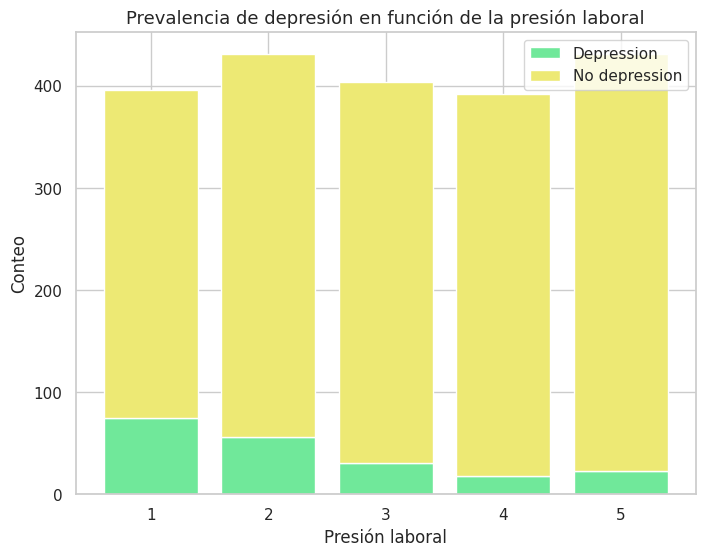

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(conteo_pressure_depression.index, conteo_pressure_depression[1], label='Depression', color=["#70E89A"])
ax.bar(conteo_pressure_depression.index, conteo_pressure_depression[0], bottom=conteo_pressure_depression[1], label='No depression', color=["#EDE974"])

ax.set_ylabel('Conteo')
ax.set_xlabel('Presión laboral')
ax.set_title("Prevalencia de depresión en función de la presión laboral", fontsize=13)
ax.legend()
plt.show()

# ¿Existe una relación entre la duración del sueño y depresión?

In [ ]:
print(df.columns)

sleep_column = 'Sleep Duration'  # Ajusta el nombre si es necesario

# Obtener los valores únicos de la columna Sleep Duration
df[sleep_column].unique()

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


array(['7-8 hours', '5-6 hours', 'More than 8 hours', 'Less than 5 hours'],
      dtype=object)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


In [ ]:

df['Sleep Duration'] = pd.Categorical(
    df['Sleep Duration'],
    categories=['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'],
    ordered=True
)

# Verificar la columna 'Depression'
print(df['Depression'].value_counts())

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Sleep Duration'], df['Depression'])
print("Tabla de contingencia:")
print(contingency_table)

# Realizar la prueba de distribucion chi-cuadrado de Pearson
# Es una prueba estadística de hipótesis que se usa para determinar si dos variables categóricas o nominales pueden estar o no relacionadas
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretación del valor p
if p < 0.05:
    print("Existe una relación significativa entre la duración del sueño y la depresión (p < 0.05).")
else:
    print

Depression
0    1851
1     203
Name: count, dtype: int64
Tabla de contingencia:
Depression           0   1
Sleep Duration            
Less than 5 hours  448  77
5-6 hours          460  45
7-8 hours          483  47
More than 8 hours  460  34

Chi-cuadrado: 19.631254230185117
Valor p: 0.0002023849496297905
Existe una relación significativa entre la duración del sueño y la depresión (p < 0.05).


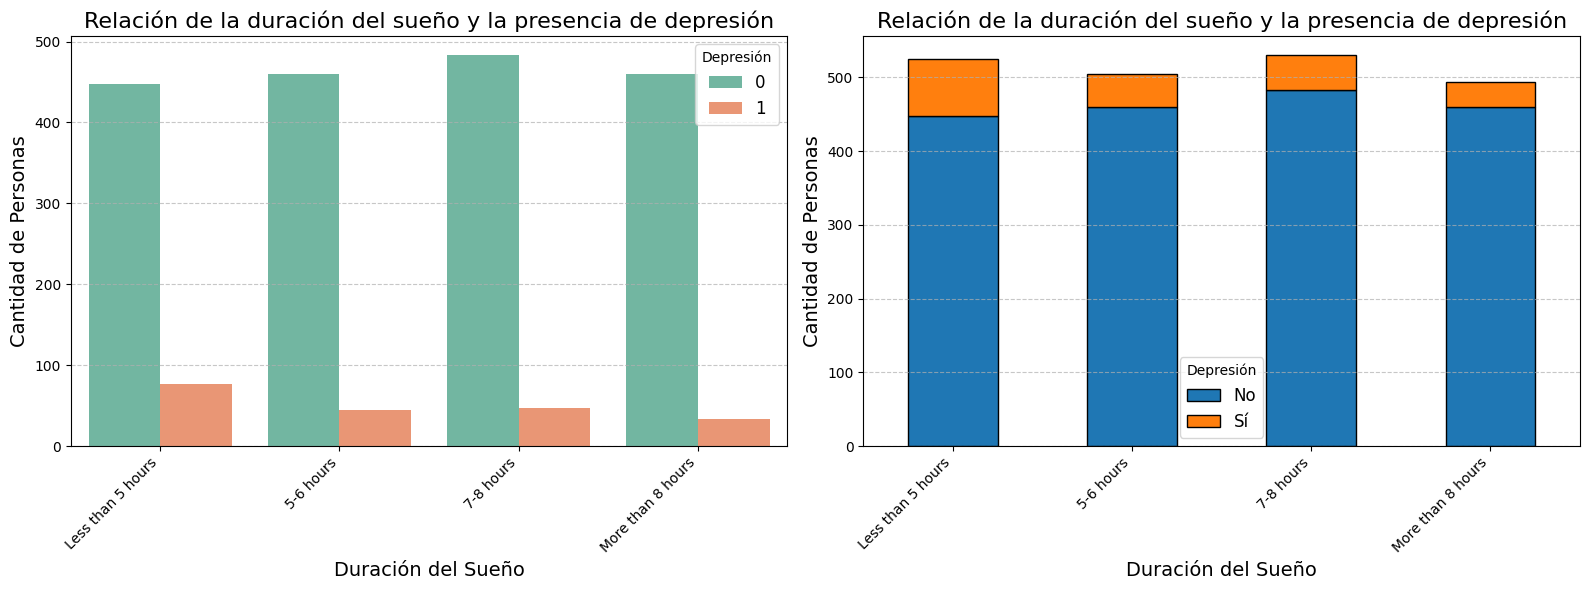

In [ ]:
# Crear una figura con dos subplots (una fila y dos columnas)
plt.figure(figsize=(16, 6))

# --- Gráfica de barras agrupadas ---
plt.subplot(1, 2, 1)  # Primer subplot
sns.countplot(data=df, x='Sleep Duration', hue='Depression', palette='Set2', order=contingency_table.index)
plt.title('Relación de la duración del sueño y la presencia de depresión', fontsize=16)
plt.xlabel('Duración del Sueño', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title='Depresión', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para mejor lectura

# --- Gráfica de barras apiladas ---
plt.subplot(1, 2, 2)  # Segundo subplot
contingency_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())
plt.title('Relación de la duración del sueño y la presencia de depresión', fontsize=16)
plt.xlabel('Duración del Sueño', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title='Depresión', labels=['No', 'Sí'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para mejor lectura

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

**CONCLUSIONES:**

* Existe una relación significativa entre la duración del sueño y la depresión.

* Dormir menos de 5 horas está asociado con una mayor probabilidad de depresión.

* Dormir más de 8 horas está asociado con una menor probabilidad de depresión.

# ¿Cómo se relacionan la edad, el estrés financiero y la presión laboral  con la presencia de depresión, y cuál de estos factores tiene el mayor impacto?

La depresión es un problema de salud mental complejo que puede estar influenciado por múltiples factores, como la edad, el estrés financiero y la presión laboral.

1. Visualizar la distribución de Age, Financial Stress, y Work Pressure

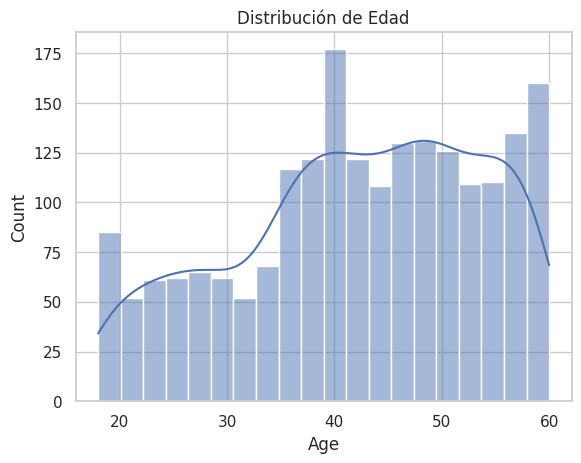

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de Edad')
plt.show()

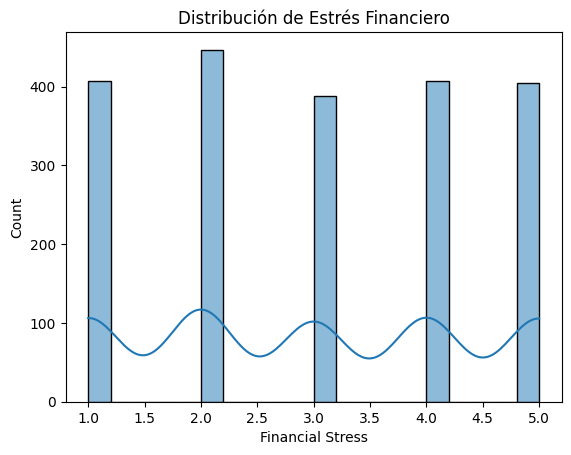

In [ ]:
sns.histplot(df['Financial Stress'], kde=True, bins=20)
plt.title('Distribución de Estrés Financiero')
plt.show()

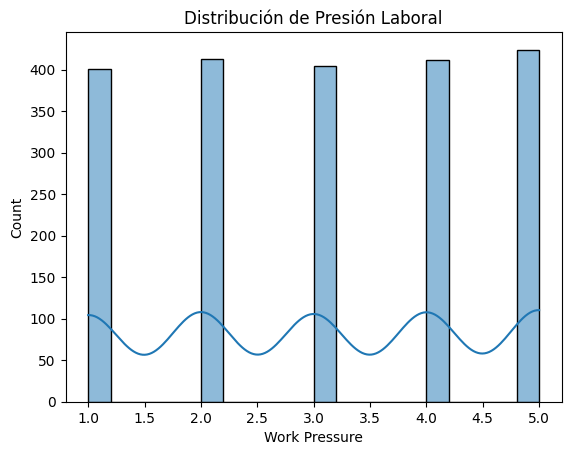

In [ ]:
sns.histplot(df['Work Pressure'], kde=True, bins=20)
plt.title('Distribución de Presión Laboral')
plt.show()

2. Visualizar la relación de depresion con las de Age, Financial Stress, y Work Pressure

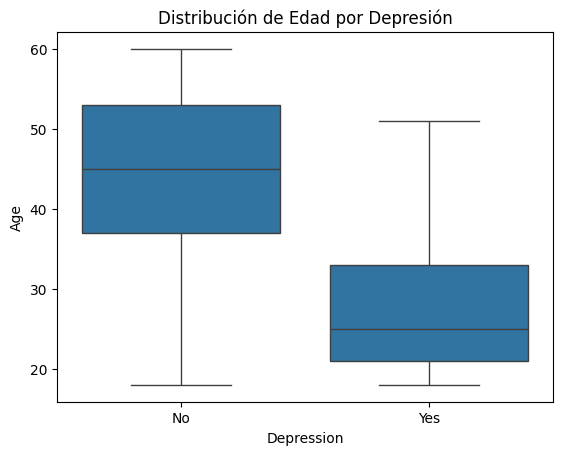

In [ ]:
# Relación entre Age y Depression:
sns.boxplot(x='Depression', y='Age', data=df)
plt.title('Distribución de Edad por Depresión')
plt.show()

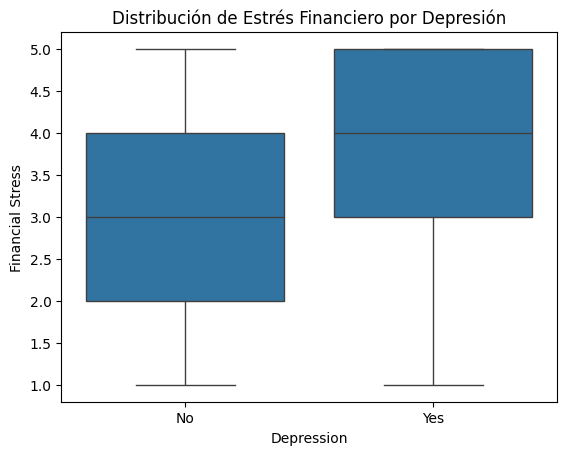

In [ ]:
# Relación entre Financial Stress y Depression:
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Distribución de Estrés Financiero por Depresión')
plt.show()

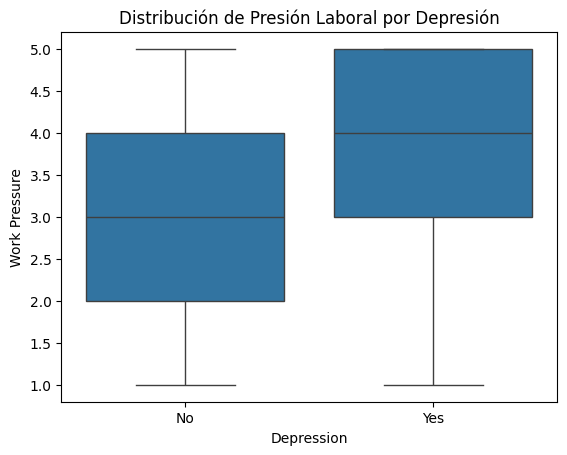

In [ ]:
# Relación entre Work Pressure y Depression:
sns.boxplot(x='Depression', y='Work Pressure', data=df)
plt.title('Distribución de Presión Laboral por Depresión')
plt.show()

3. Determinar si hay una relación significativa entre Depression y  Financial Stress o Work Pressure.

In [ ]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia para Financial Stress y Depression
contingency_table_financial = pd.crosstab(df['Financial_Stress'], df['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table_financial)
print(f"Valor p (Financial Stress): {p}")

# Crear tabla de contingencia para Work Pressure y Depression
contingency_table_work = pd.crosstab(df['Work_Pressure'], df['Depression'])
chi2, p, dof, expected = chi2_contingency(contingency_table_work)
print(f"Valor p (Work Pressure): {p}")

Valor p (Financial Stress): 9.75246451709429e-11
Valor p (Work Pressure): 1.431522470776801e-17


4. Calcular la correlación entre Age, Financial Stress, y Work Pressure.

In [ ]:
# Convertir 'Depression' a valores numéricos
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})

In [ ]:
# Verificar que las columnas sean numéricas
print(df[['Age', 'Financial_Stress', 'Work_Pressure', 'Depression']].dtypes)

Age                   int64
Financial_Stress      int64
Work_Pressure         int64
Depression          float64
dtype: object


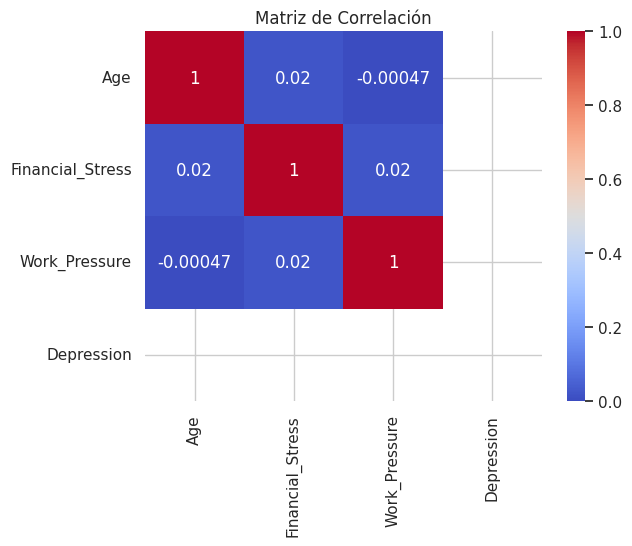

In [ ]:
correlation_matrix = df[['Age', 'Financial_Stress', 'Work_Pressure', 'Depression']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

5. Identificar los factores más importantes que influyen en la depresión.

In [ ]:
#Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Preparar datos
X = df[['Age', 'Financial Stress', 'Work Pressure']]  # Use original column names
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print(model.coef_)

[[-0.17182955  0.59435783  0.69951484]]


In [ ]:

# Inicializar el modelo de Regresión Logística
logreg = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = logreg.predict(X_test)

# Obtener el score del modelo en los datos de prueba
score = logreg.score(X_test, y_test)
print(f"Precisión del modelo: {score:.2f}")

Precisión del modelo: 0.92


In [ ]:
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       368
           1       0.78      0.33      0.46        43

    accuracy                           0.92       411
   macro avg       0.85      0.66      0.71       411
weighted avg       0.91      0.92      0.90       411

[[364   4]
 [ 29  14]]


In [ ]:
!pip install scikit-learn --upgrade
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

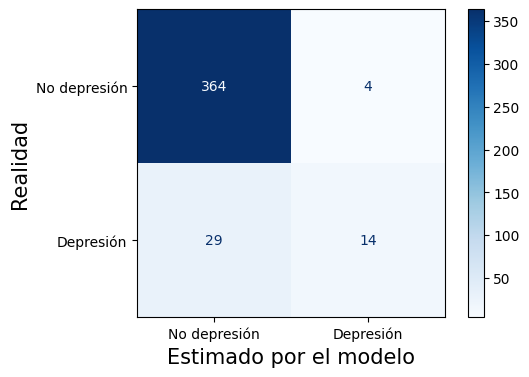

In [ ]:


# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con tamaño ajustado
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No depresión', 'Depresión'])
fig, ax = plt.subplots(figsize=(6, 4))  # Ajustar el tamaño de la figura aquí
disp.plot(cmap='Blues', ax=ax)  # Pasar el objeto ax al método plot
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15, x=0.5) # added fontsize to make it consistent, and centered by using x=0.5

plt.show()

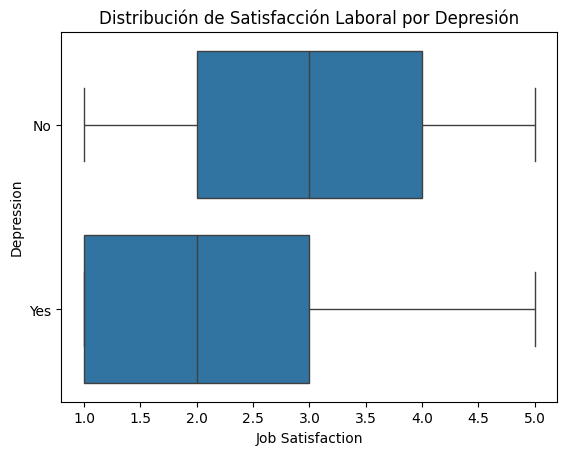

In [ ]:
# Relación entre Job satisfaction y Depression:
sns.boxplot(x='Job Satisfaction', y='Depression', data=df)
plt.title('Distribución de Satisfacción Laboral por Depresión')
plt.show()

# ¿Qué tipo de hábitos alimenticios son más comunes en personas con depresión?

In [ ]:
# Preprocesamiento de datos
# Convertir 'Dietary habits' en una variable categórica ordenada
df['Dietary Habits'] = pd.Categorical(
    df['Dietary Habits'],
    categories=['Healthy', 'Moderate', 'Unhealthy'],
    ordered=True
)

# Verificar la columna 'Depression'
print(df['Depression'].value_counts())

# Crear una tabla de contingencia
contingency_table_health = pd.crosstab(df['Dietary Habits'], df['Depression'])
print("Tabla de contingencia de habitos saludables:")
print(contingency_table_health)

# Realizar la prueba de distribucion chi-cuadrado de Pearson
# Es una prueba estadística de hipótesis que se usa para determinar si dos variables categóricas o nominales pueden estar o no relacionadas
chi2, p, dof, expected = chi2_contingency(contingency_table_health)
print(f"\nChi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretación del valor p
if p < 0.05:
    print("Existe una relación significativa entre la duración del sueño y la depresión (p < 0.05).")
else:
    print("No existe una relación significativa entre la duración del sueño y la depresión (p >= 0.05).")

Depression
No     1851
Yes     203
Name: count, dtype: int64
Tabla de contingencia de habitos saludables:
Depression       No  Yes
Dietary Habits          
Healthy         635   46
Moderate        601   59
Unhealthy       615   98

Chi-cuadrado: 20.080859919921313
Valor p: 4.360102232946581e-05
Existe una relación significativa entre la duración del sueño y la depresión (p < 0.05).


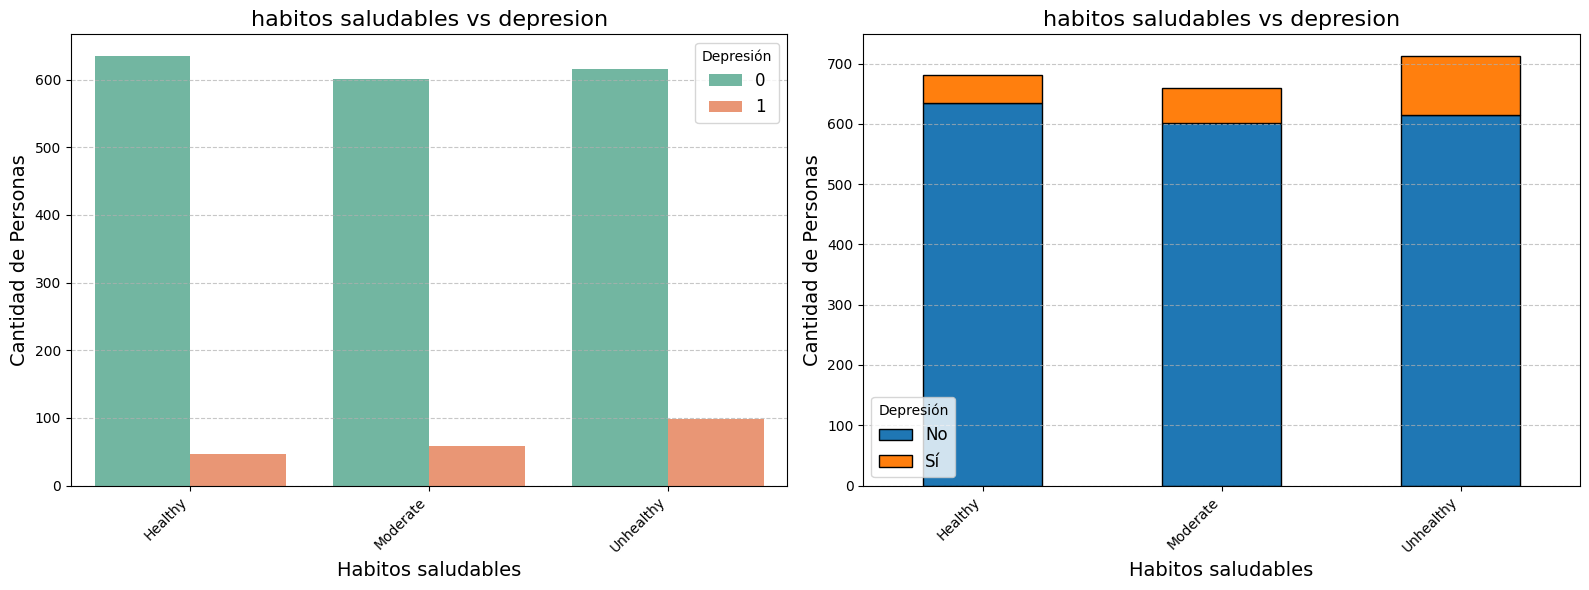

In [ ]:
# Crear una figura con dos subplots (una fila y dos columnas)
plt.figure(figsize=(16, 6))

# --- Gráfica de barras agrupadas ---
plt.subplot(1, 2, 1)  # Primer subplot
sns.countplot(data=df, x='Dietary Habits', hue='Depression', palette='Set2', order=contingency_table_health.index)
plt.title('habitos saludables vs depresion', fontsize=16)
plt.xlabel('Habitos saludables', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title='Depresión', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para mejor lectura


# --- Gráfica de barras apiladas ---
plt.subplot(1, 2, 2)  # Segundo subplot
contingency_table_health.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())
plt.title('habitos saludables vs depresion', fontsize=16)
plt.xlabel('Habitos saludables', fontsize=14)
plt.ylabel('Cantidad de Personas', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title='Depresión', labels=['No', 'Sí'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para mejor lectura

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()


# ¿Qué tipo de hábitos alimenticios son más comunes en personas con depresión?

In [ ]:
df['Depression'] = df['Depression'].map({'Yes': 1, 'No': 0})

In [ ]:
# Tabla de frecuencias para los habitos alimenticios de personas con y sin depresion
freq_table = pd.crosstab(df['Dietary Habits'], df['Depression'])
print(freq_table)

Depression        0   1
Dietary Habits         
Healthy         635  46
Moderate        601  59
Unhealthy       615  98


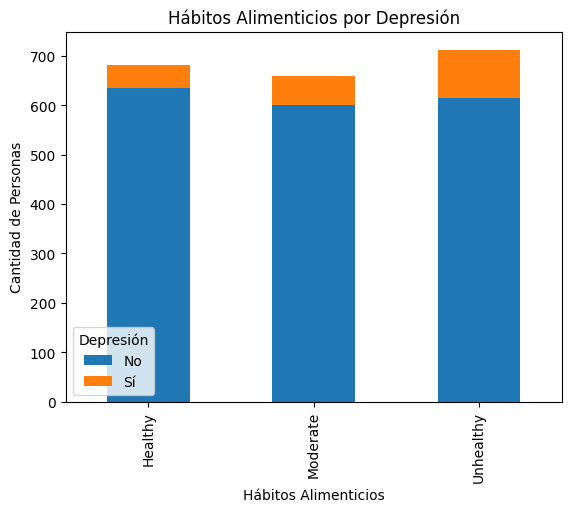

In [ ]:
# Visualizar la distribución de hábitos alimenticios en personas con y sin depresión.
# Gráfica de barras apiladas
freq_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Hábitos Alimenticios por Depresión')
plt.xlabel('Hábitos Alimenticios')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Depresión', labels=['No', 'Sí'])
plt.show()

<ipython-input-11-669ad5b123b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dietary Habits', data=df_depression, palette='Set2')


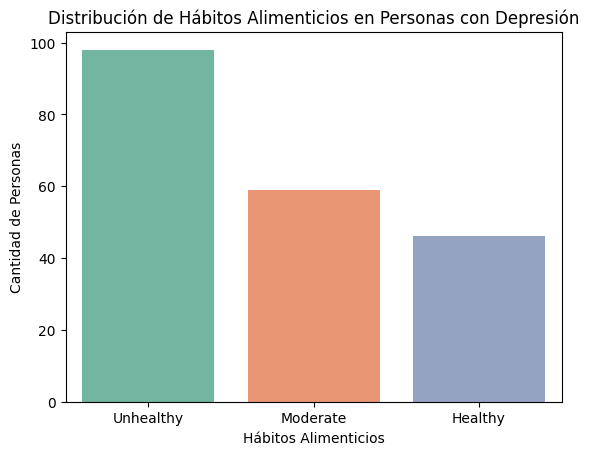

In [ ]:
# Mostrar habitos alimenticios solo con personas con depresión
df_depression = df[df['Depression'] == 1]

# Gráfica de barras
sns.countplot(x='Dietary Habits', data=df_depression, palette='Set2')
plt.title('Distribución de Hábitos Alimenticios en Personas con Depresión')
plt.xlabel('Hábitos Alimenticios')
plt.ylabel('Cantidad de Personas')
plt.show()

**Conclusiones:**

* El grupo con hábitos alimenticios no saludables (Unhealthy) tiene la mayor cantidad de personas con depresión (98 casos).
* El grupo con hábitos alimenticios saludables (Healthy) tiene la menor cantidad de personas con depresión (46 casos).
* El grupo con hábitos alimenticios moderados (Moderate) tiene una proporción de personas con depresión (59 casos) que es mayor que la de los hábitos saludables pero menor que la de los hábitos no saludables.
* Todo lo anterior, respalda la idea de que los hábitos alimenticios podrían influir en la probabilidad de desarrollar depresión.